In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Add
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Conv2DTranspose
from keras.utils import np_utils

Using TensorFlow backend.


### check GPU setting

In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [4]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

('X_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [28]:
x = Input(shape=(28, 28,1))
res0 = x

# Encoder
conv1_1 = Conv2D(96, (3, 3), kernel_initializer='he_normal', activation='relu', padding='same')(x)
conv1_2 = Conv2D(96, (3, 3), kernel_initializer='he_normal', activation='relu', padding='same')(conv1_1)
res1 = conv1_2
conv1_3 = Conv2D(96, (3, 3), kernel_initializer='he_normal', activation='relu', padding='same')(conv1_2)
conv1_4 = Conv2D(96, (3, 3), kernel_initializer='he_normal', activation='relu', padding='same')(conv1_3)
res2 = conv1_4
conv1_5 = Conv2D(96, (3, 3), kernel_initializer='he_normal', activation='relu', padding='same')(conv1_4)

# Decoder
conv2_1 = Conv2DTranspose(96, (3, 3), kernel_initializer='he_normal', padding='same')(conv1_5)
conv2_1_add = Add()([res2, conv2_1])
conv2_1_add = Activation('relu')(conv2_1_add)

conv2_2 = Conv2DTranspose(96, (3, 3), kernel_initializer='he_normal', activation='relu', padding='same')(conv2_1_add)
conv2_3 = Conv2DTranspose(96, (3, 3), kernel_initializer='he_normal', padding='same')(conv2_2)
conv2_3_add = Add()([res1, conv2_3])
conv2_3_add = Activation('relu')(conv2_3_add)

conv2_4 = Conv2DTranspose(96, (3, 3), kernel_initializer='he_normal', activation='relu', padding='same')(conv2_3_add)
conv2_5 = Conv2DTranspose(1, (3, 3), kernel_initializer='he_normal', padding='same')(conv2_4)
conv2_5_add = Add()([res0, conv2_5])
out = Activation('relu')(conv2_5_add)

autoencoder = Model(inputs=x, outputs=out)
autoencoder.compile(optimizer='adam', loss='mse')

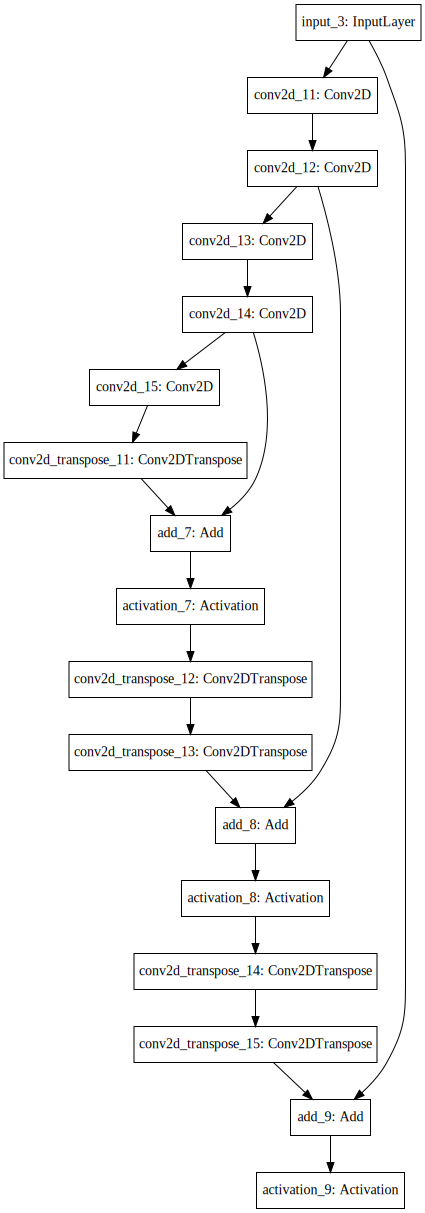

In [24]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#plot_model(autoencoder)
SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [13]:
epochs = 10
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0585 - val_loss: 0.0581
Epoch 2/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0584 - val_loss: 0.0581
Epoch 3/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0584 - val_loss: 0.0581
Epoch 4/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0584 - val_loss: 0.0581
Epoch 5/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0584 - val_loss: 0.0581
Epoch 6/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0584 - val_loss: 0.0581
Epoch 7/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0584 - val_loss: 0.0581
Epoch 8/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0584 - val_loss: 0.0581
Epoch 9/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0584 - val_loss: 0.0

In [14]:
decoded_imgs = autoencoder.predict(X_test)

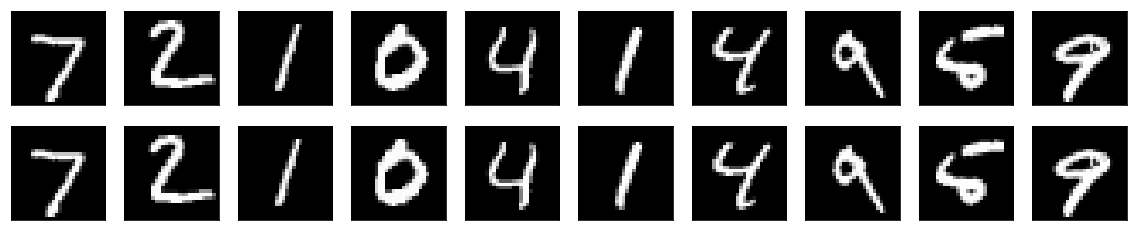

In [15]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### generate noisy data

In [16]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [29]:
epochs = 100
batch_size = 128

history = autoencoder.fit(X_train_noisy, X_train, batch_size=batch_size, 
                          epochs=epochs, verbose=1, validation_data=(X_test_noisy, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 120s 2ms/step - loss: 0.2621 - val_loss: 0.1140
Epoch 2/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 3/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 4/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 5/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 6/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 7/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 8/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 9/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_

60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 77/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 78/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 79/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 80/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 81/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 82/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 83/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 84/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1919 - val_loss: 0.1140
Epoch 85/100
60000/60000 [===============

In [30]:
decoded_imgs = autoencoder.predict(X_test_noisy)

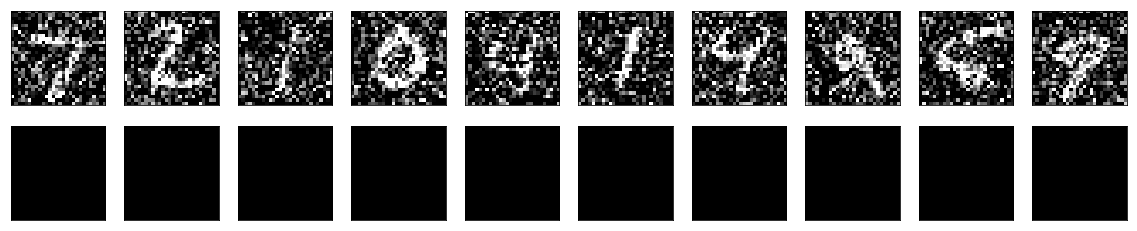

In [31]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()